In [1]:
# Import basic packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the data
data = pd.read_csv('yelp.csv')

In [3]:
data.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [5]:
data.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [6]:
data['length'] = data['text'].apply(len)

<AxesSubplot:ylabel='Frequency'>

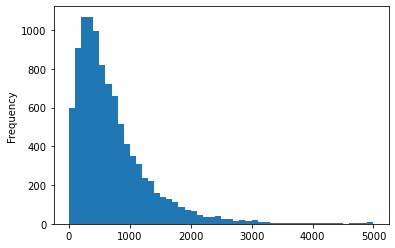

In [7]:
data['length'].plot(bins = 50, kind = 'hist')

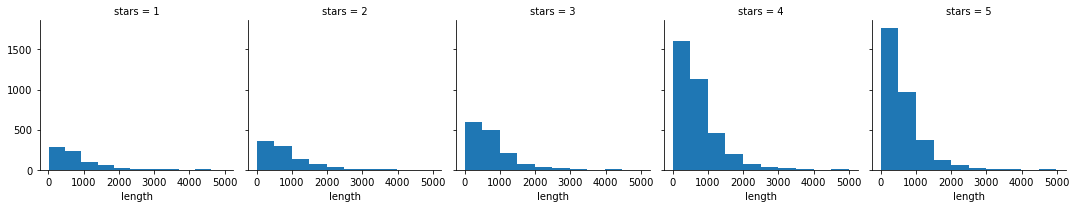

In [8]:
g = sns.FacetGrid(data, col='stars')
g.map(plt.hist, 'length')

<AxesSubplot:xlabel='stars', ylabel='count'>

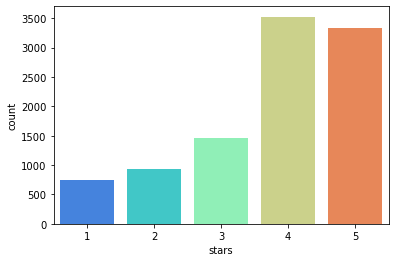

In [9]:
sns.countplot(x = 'stars', data = data, palette='rainbow')

<AxesSubplot:xlabel='stars', ylabel='length'>

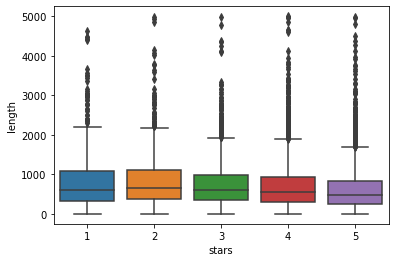

In [10]:
sns.boxplot(x = data['stars'], y = data['length'])

In [11]:
stars = data.groupby(by = 'stars').mean()
stars

,cool,useful,funny,length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


In [12]:
stars.corr()

,cool,useful,funny,length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
length,-0.857664,0.699881,0.843461,1.000000


<AxesSubplot:>

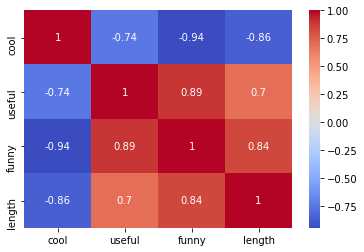

In [13]:
sns.heatmap(stars.corr(), annot=True, cmap = 'coolwarm')

In [14]:
data['length'].describe()

count    10000.000000
mean       710.738700
std        617.399827
min          1.000000
25%        294.000000
50%        541.500000
75%        930.000000
max       4997.000000
Name: length, dtype: float64

In [15]:
data[data['length'] == 4997]['text'].iloc[0]

'In our continuing quest to identify cool, locally owned places to eat and/or drink, Caroline and I auditioned Vintage 95 last night. \n\nBefore I go further, understand that whenever I go out for eats or drinks, I have  in  mind a Platonic Ideal of the Bar/Pub/Eatery I most want to frequent. I\'m on a constant quest to find that  Ideal expressed in Real Life. \n\nVintage 95 isn\'t quite there, but it\'s damn close. If I ever give something Five Stars, you\'ll know it has pegged my Platonic Ideal. Anyway...\n\nThe plan last night was for drinks. No plans for food, just Adult Beverages and warm conversation. But it turned into more.\n\nThe location in downtown Chandler is terrific for us. The owners have created a very fine visual experience - leather, stone, dark woods, good lighting. And they don\'t have the music turned up so loud that you CANNOT HAVE A CONVERSATION. This is one of my pet peeves. If I want to stare at people move their mouths while enduring an aural assault, I\'ll st

In [16]:
# Only take the relevant columns
X = data['text']
y = data['stars']

# TEXT Preprocessing

In [17]:
import string

In [18]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [19]:
first_review = X[0]
first_review

'My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\n\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.  I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\n\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I\'ve ever had.\n\nAnyway, I can\'t wait to go back!'

In [20]:
nopunc = [char for char in first_review if char not in string.punctuation]
nopunc = ''.join(nopunc)
nopunc

'My wife took me here on my birthday for breakfast and it was excellent  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure  Our waitress was excellent and our food arrived quickly on the semibusy Saturday morning  It looked like the place fills up pretty quickly so the earlier you get here the better\n\nDo yourself a favor and get their Bloody Mary  It was phenomenal and simply the best Ive ever had  Im pretty sure they only use ingredients from their garden and blend them fresh when you order it  It was amazing\n\nWhile EVERYTHING on the menu looks excellent I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete  It was the best toast Ive ever had\n\nAnyway I cant wait to go back'

In [21]:
len(nopunc.split())

155

In [22]:
from nltk.corpus import stopwords
stopwords.words('english')[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [23]:
clean_review = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
clean_review

['wife',
 'took',
 'birthday',
 'breakfast',
 'excellent',
 'weather',
 'perfect',
 'made',
 'sitting',
 'outside',
 'overlooking',
 'grounds',
 'absolute',
 'pleasure',
 'waitress',
 'excellent',
 'food',
 'arrived',
 'quickly',
 'semibusy',
 'Saturday',
 'morning',
 'looked',
 'like',
 'place',
 'fills',
 'pretty',
 'quickly',
 'earlier',
 'get',
 'better',
 'favor',
 'get',
 'Bloody',
 'Mary',
 'phenomenal',
 'simply',
 'best',
 'Ive',
 'ever',
 'Im',
 'pretty',
 'sure',
 'use',
 'ingredients',
 'garden',
 'blend',
 'fresh',
 'order',
 'amazing',
 'EVERYTHING',
 'menu',
 'looks',
 'excellent',
 'white',
 'truffle',
 'scrambled',
 'eggs',
 'vegetable',
 'skillet',
 'tasty',
 'delicious',
 'came',
 '2',
 'pieces',
 'griddled',
 'bread',
 'amazing',
 'absolutely',
 'made',
 'meal',
 'complete',
 'best',
 'toast',
 'Ive',
 'ever',
 'Anyway',
 'cant',
 'wait',
 'go',
 'back']

In [24]:
# Lets make a function with all the above steps

def text_process(first_review):
    """
    Takes a string as an input and does the following,
    1. Removes all the punctuation
    2. Removes all the stopwords
    3. Returns a list of the cleaned text
    """

    nopunc = [char for char in first_review if char not in string.punctuation]
    
    nopunc = ''.join(nopunc)
    
    return (word for word in nopunc.split() if word.lower() not in stopwords.words('english'))

In [59]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [62]:
from sklearn.pipeline import Pipeline

In [63]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])

In [64]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000001E309D935E0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [65]:
predictions = pipeline.predict(X_test)

In [66]:
from sklearn.metrics import classification_report, confusion_matrix

In [67]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[  0   0   0 184  34]
 [  0   0   0 246  19]
 [  0   0   0 422  20]
 [  0   0   0 955 132]
 [  0   0   0 661 327]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       218
           2       0.00      0.00      0.00       265
           3       0.00      0.00      0.00       442
           4       0.39      0.88      0.54      1087
           5       0.61      0.33      0.43       988

    accuracy                           0.43      3000
   macro avg       0.20      0.24      0.19      3000
weighted avg       0.34      0.43      0.34      3000



In [68]:
from sklearn.svm import LinearSVC

In [69]:
pipeline_svc = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', LinearSVC())
])

In [70]:
pipeline_svc.fit(X_train, y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000001E309D935E0>)),
                ('tfidf', TfidfTransformer()), ('classifier', LinearSVC())])

In [71]:
predictions_svc = pipeline_svc.predict(X_test)

In [72]:
print(confusion_matrix(y_test,predictions_svc))
print(classification_report(y_test,predictions_svc))

[[ 86  35  21  29  47]
 [ 47  83  57  53  25]
 [ 14  35 121 185  87]
 [  8  24  99 580 376]
 [  6   4  22 339 617]]
              precision    recall  f1-score   support

           1       0.53      0.39      0.45       218
           2       0.46      0.31      0.37       265
           3       0.38      0.27      0.32       442
           4       0.49      0.53      0.51      1087
           5       0.54      0.62      0.58       988

    accuracy                           0.50      3000
   macro avg       0.48      0.43      0.45      3000
weighted avg       0.49      0.50      0.49      3000



In [73]:
pipeline_1 = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),
    ('classifier', MultinomialNB())
])

In [74]:
pipeline_1.fit(X_train, y_train)

predictions_1 = pipeline_1.predict(X_test)

print(confusion_matrix(y_test,predictions_1))
print(classification_report(y_test,predictions_1))

[[ 44  16  15 100  43]
 [  8  15  27 187  28]
 [  2   4  24 362  50]
 [  4   1   5 834 243]
 [  1   1   0 488 498]]
              precision    recall  f1-score   support

           1       0.75      0.20      0.32       218
           2       0.41      0.06      0.10       265
           3       0.34      0.05      0.09       442
           4       0.42      0.77      0.55      1087
           5       0.58      0.50      0.54       988

    accuracy                           0.47      3000
   macro avg       0.50      0.32      0.32      3000
weighted avg       0.48      0.47      0.42      3000



In [25]:
from tensorflow.keras import layers
from tensorflow.keras import losses

In [35]:
!pip install tensorflow-hub
import tensorflow as tf
import tensorflow_hub as hub

In [36]:
embedding = "https://tfhub.dev/google/nnlm-en-dim50/2"
hub_layer = hub.KerasLayer(embedding, input_shape=[], 
                           dtype=tf.string, trainable=True)
hub_layer(X_train[:3])

<tf.Tensor: shape=(3, 50), dtype=float32, numpy=
array([[ 0.44582763, -0.02062587, -0.07558685, -0.14580487, -0.05068098,
        -0.28207198,  0.05585542,  0.22809039, -0.33593687,  0.0632904 ,
        -0.08240871, -0.19248526,  0.08091208,  0.14243397,  0.18662596,
        -0.0325041 ,  0.25012732, -0.01660961,  0.09611144, -0.15991871,
        -0.22938977, -0.05850301,  0.00624527, -0.02962634, -0.28023243,
         0.01619345, -0.0099785 ,  0.00530295, -0.00912572, -0.11217704,
         0.10640872,  0.08625749,  0.01944032, -0.08932694,  0.14604808,
        -0.00896992,  0.194026  ,  0.24855946, -0.03554949, -0.0779039 ,
        -0.15314078,  0.28132454, -0.13609809, -0.1842682 , -0.26410547,
         0.13973273, -0.07753986,  0.02034577, -0.0200662 ,  0.40245467],
       [ 0.8606046 , -0.14674321, -0.12015703,  0.6155124 ,  0.21547882,
        -0.3241696 ,  0.16283327, -0.21048841, -0.39224574,  0.43207717,
         0.23615459,  0.03917067,  0.06430697,  0.20794302, -0.26532736,
 

In [52]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(12, activation='relu'))
model.add(tf.keras.layers.Dense(5, activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 50)                48190600  
                                                                 
 dense_6 (Dense)             (None, 12)                612       
                                                                 
 dense_7 (Dense)             (None, 5)                 65        
                                                                 
Total params: 48,191,277
Trainable params: 48,191,277
Non-trainable params: 0
_________________________________________________________________


In [53]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [54]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    verbose=1)

Epoch 1/10


ValueError: in user code:

    File "C:\Users\Narex\anaconda3\lib\site-packages\keras\engine\training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\Narex\anaconda3\lib\site-packages\keras\engine\training.py", line 1010, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Narex\anaconda3\lib\site-packages\keras\engine\training.py", line 1000, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\Narex\anaconda3\lib\site-packages\keras\engine\training.py", line 860, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\Narex\anaconda3\lib\site-packages\keras\engine\training.py", line 918, in compute_loss
        return self.compiled_loss(
    File "C:\Users\Narex\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\Narex\anaconda3\lib\site-packages\keras\losses.py", line 141, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\Narex\anaconda3\lib\site-packages\keras\losses.py", line 245, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\Narex\anaconda3\lib\site-packages\keras\losses.py", line 1789, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "C:\Users\Narex\anaconda3\lib\site-packages\keras\backend.py", line 5083, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 5) are incompatible
